# Credit Fraud Detection - Team 2

## PS4 - Task 1

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# imports

import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load dataset

fraud_datasets = "YOUR_DATASET_PATH"

data = pd.read_csv(fraud_datasets)

df = pd.DataFrame(data)

## Visualization of training dataset

In [4]:
# EDA

# Check for missing values
print(df.isnull().sum())

# Get general info on the dataset
print(df.info())

# Basic statistics
print(df.describe())

ssn           0
cc_num        0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
acct_num      0
profile       0
trans_num     0
trans_date    0
trans_time    0
unix_time     0
category      0
amt           0
merchant      0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700807 entries, 0 to 700806
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ssn         700807 non-null  object 
 1   cc_num      700807 non-null  int64  
 2   first       700807 non-null  object 
 3   last        700807 non-null  object 
 4   gender      700807 non-null  object 
 5   street      700807 non-null  object 
 6   city        700807 non-null  object 
 7   state       700807 non-null  object 
 8   zip         700807 non-null  int64 

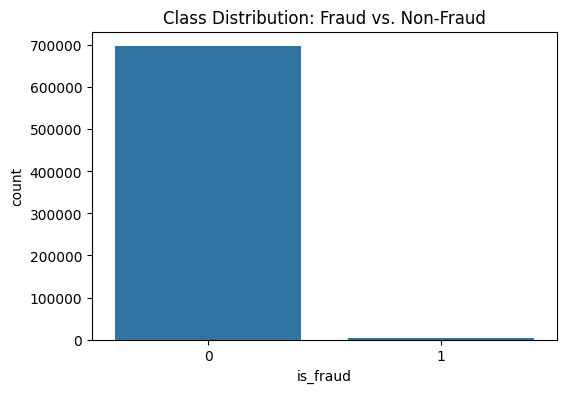

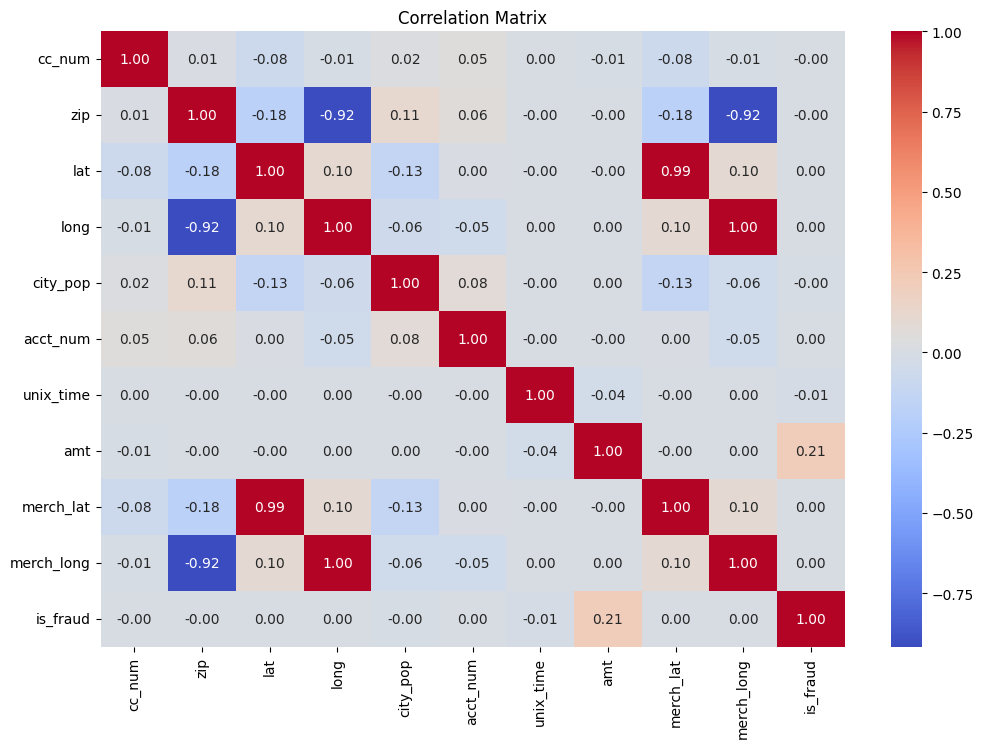

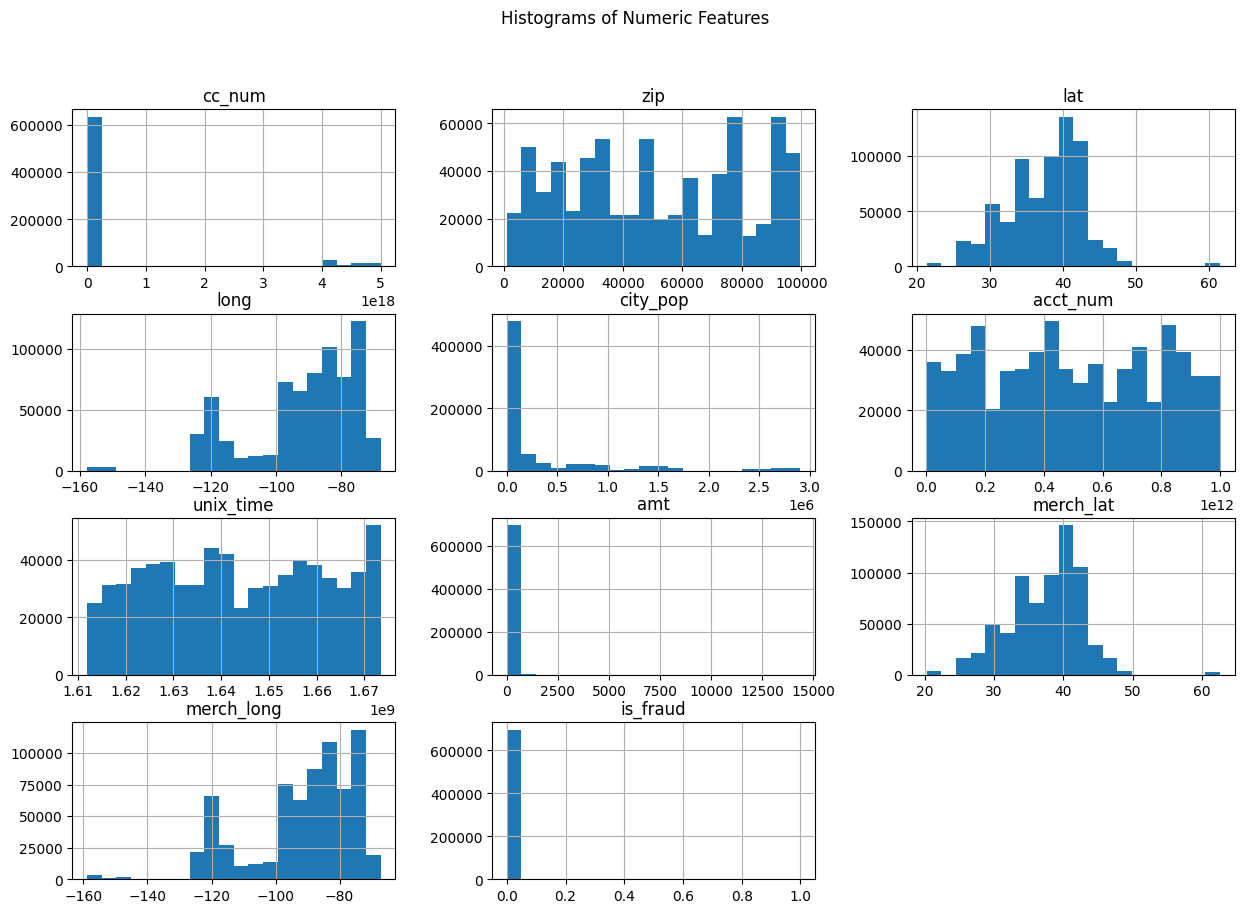

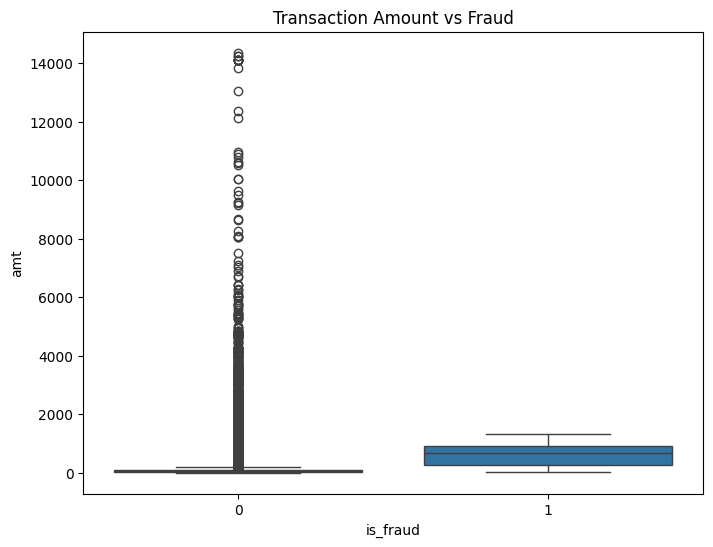

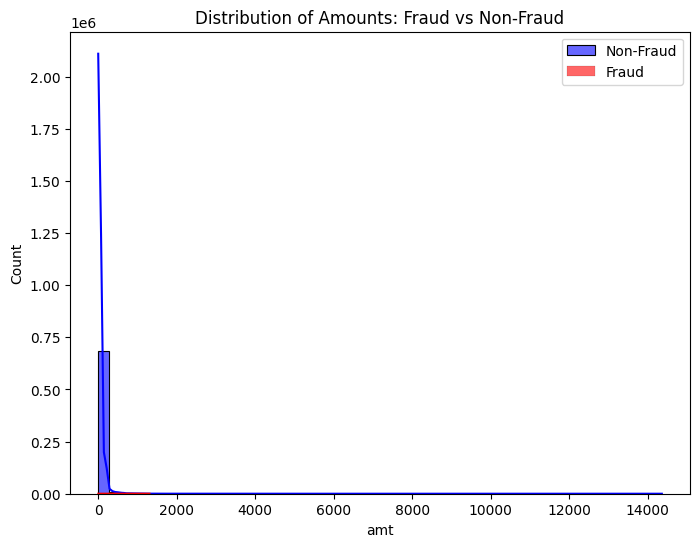

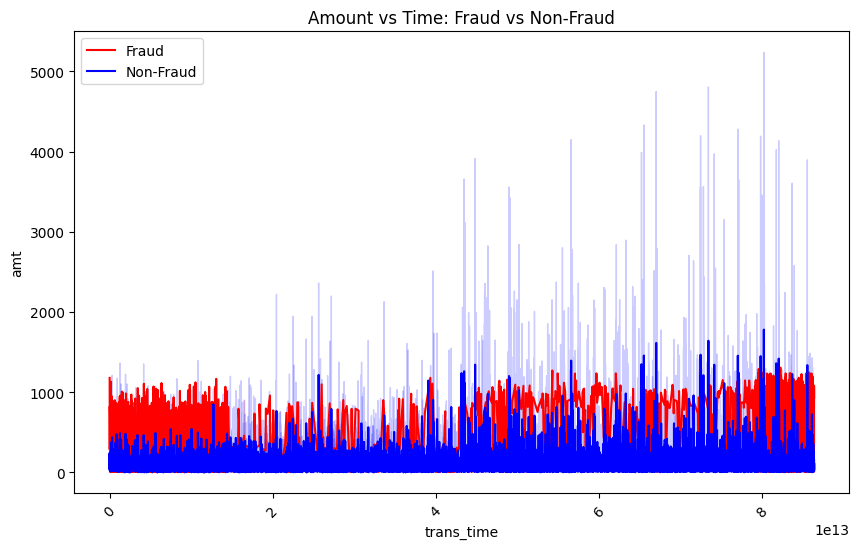

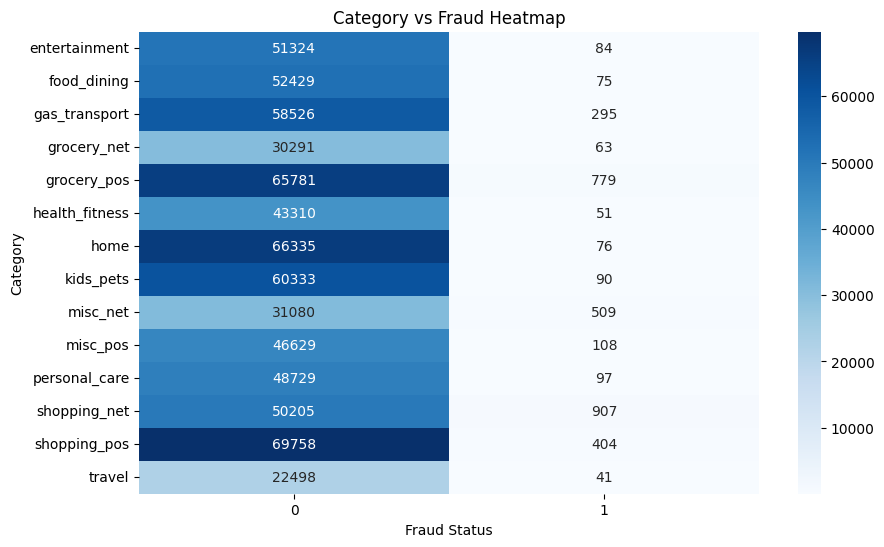

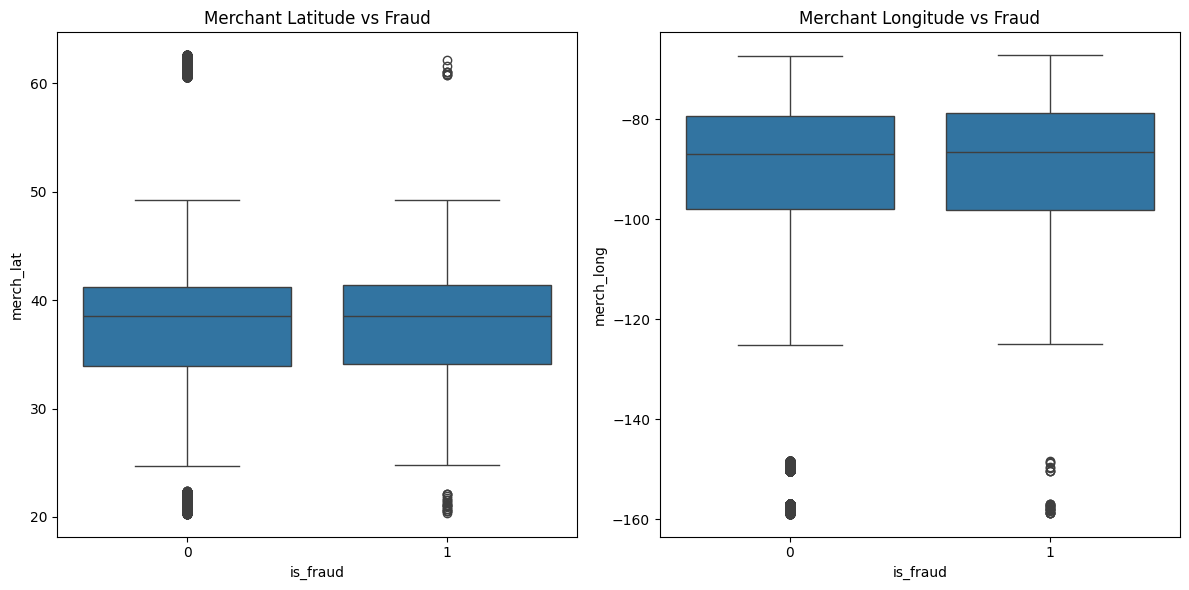

In [5]:
# Plot distribution of fraud vs non-fraud
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution: Fraud vs. Non-Fraud')
plt.show()

#################
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#################
# Plot histograms for numeric columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

#################
# Scatter plot for 'amt' vs 'is_fraud'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amount vs Fraud')
plt.show()

#################
# Plot distribution of 'amt' for fraud vs non-fraud
plt.figure(figsize=(8, 6))
sns.histplot(df[df['is_fraud'] == 0]['amt'], bins=50, color='blue', kde=True, label='Non-Fraud', alpha=0.6)
sns.histplot(df[df['is_fraud'] == 1]['amt'], bins=50, color='red', kde=True, label='Fraud', alpha=0.6)
plt.title('Distribution of Amounts: Fraud vs Non-Fraud')
plt.legend()
plt.show()

#################
# Convert trans_time into a pandas datetime object for better visualization
df['trans_time'] = pd.to_timedelta(df['trans_time'])

# Plot fraud transactions over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='trans_time', y='amt', data=df[df['is_fraud'] == 1], label='Fraud', color='red')
sns.lineplot(x='trans_time', y='amt', data=df[df['is_fraud'] == 0], label='Non-Fraud', color='blue')
plt.title('Amount vs Time: Fraud vs Non-Fraud')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#################
# Plot heatmap for category vs fraud status
category_fraud = pd.crosstab(df['category'], df['is_fraud'])

plt.figure(figsize=(10, 6))
sns.heatmap(category_fraud, annot=True, cmap='Blues', fmt='d')
plt.title('Category vs Fraud Heatmap')
plt.ylabel('Category')
plt.xlabel('Fraud Status')
plt.show()

#################
# Boxplot for merchant latitude and longitude by fraud status
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='is_fraud', y='merch_lat', data=df)
plt.title('Merchant Latitude vs Fraud')

plt.subplot(1, 2, 2)
sns.boxplot(x='is_fraud', y='merch_long', data=df)
plt.title('Merchant Longitude vs Fraud')

plt.tight_layout()
plt.show()

## Train the DecisionTree Model for Fraud Detection

/tmp/ipykernel_2659487/4279464176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["job"] = LabelEncoder().fit_transform(df["job"])
/tmp/ipykernel_2659487/4279464176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"] = LabelEncoder().fit_transform(df["category"])
/tmp/ipykernel_2659487/4279464176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

=== Improved Decision Tree Model ===
Accuracy: 0.9498
Macro F1 Score: 0.9427
F1 Score for Fraud Class: 0.9226
ROC AUC: 0.9367

Classification Report (Improved Decision Tree):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    697228
           1       0.95      0.90      0.92    348614

    accuracy                           0.95   1045842
   macro avg       0.95      0.94      0.94   1045842
weighted avg       0.95      0.95      0.95   1045842


Confusion Matrix:
[[680506  16722]
 [ 35777 312837]]


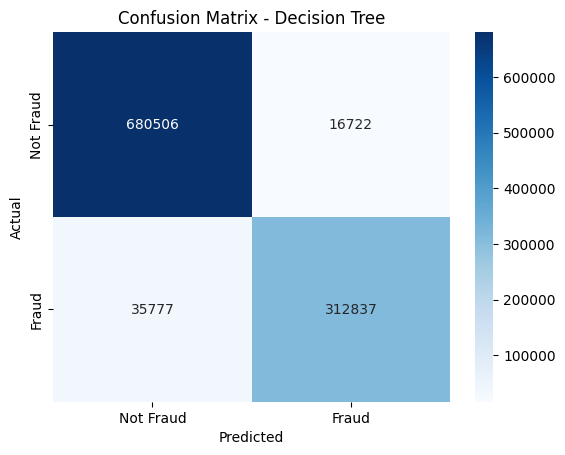

In [6]:
# Filter for important features
important_features = ['zip', 'lat', 'long', 'merch_long', 'amt', 'job', 'category', 'merchant', 'city_pop', 'is_fraud']
df = data[important_features]

# Label Encoding for categorical features
df["job"] = LabelEncoder().fit_transform(df["job"])
df["category"] = LabelEncoder().fit_transform(df["category"])
df["merchant"] = LabelEncoder().fit_transform(df["merchant"])

# Features and target
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

# Resampling using SMOTE (to address class imbalance)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "criterion": ["entropy"],
    "max_depth": [20],
    "min_samples_split": [2],
    "min_samples_leaf": [5],   # Restrict leaf size to avoid overfitting
    "class_weight": [None],
    "max_features": [None]
}

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Grid Search with ROC AUC as the scoring metric
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X_res, y_res)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with best parameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_res, y_res)

# Predictions on the resampled dataset
y_pred = best_dt_model.predict(X_res)

# Evaluate the model
accuracy = accuracy_score(y_res, y_pred)
roc_auc = roc_auc_score(y_res, y_pred)
macro_f1 = f1_score(y_res, y_pred, average="macro")
fraud_f1 = f1_score(y_res, y_pred, average=None)[1]

# Display results
print("\n=== Improved Decision Tree Model ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {macro_f1:.4f}")
print(f"F1 Score for Fraud Class: {fraud_f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Classification report
print("\nClassification Report (Improved Decision Tree):")
print(classification_report(y_res, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_res, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Confusion Matrix visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix - Decision Tree")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Save the Final Model

In [7]:
# Save the model

joblib.dump(best_dt_model, 'team_2_task_1_decision_tree_model.joblib')

# Optionally, you can load the model to ensure it's saved correctly
loaded_model = joblib.load('team_2_task_1_decision_tree_model.joblib')
print("Model loaded successfully!")


Model loaded successfully!


## Load the Final Model and Inference

In [8]:
# Load the saved model
loaded_model = joblib.load('team_2_task_1_decision_tree_model.joblib')

# Use the model to make predictions on new data (X_new)
# y_pred_new = loaded_model.predict(X_new)